In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [45]:
data = pd.read_csv("C:\\Users\\Dell\\Desktop\\MOTHERSUMI.NS (1).csv", date_parser = True)
#data.tail()
data.isnull().sum()

Date          0
Open         74
High         74
Low          74
Close        74
Adj Close    74
Volume       74
dtype: int64

In [46]:
data = data.fillna(method = 'ffill')
data = data.dropna()

In [47]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
data_training = data[data['Date']<'2020-01-01'].copy()
data_test = data[data['Date']>='2020-01-01'].copy()
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,0.29264,0.29264,0.29264,0.29264,2.004262,52539.0
1,2002-07-02,0.29264,0.29264,0.29264,0.29264,2.004262,244568.0
2,2002-07-03,0.29264,0.29264,0.29264,0.29264,2.004262,184631.0
3,2002-07-04,0.29264,0.29264,0.29264,0.29264,2.004262,122096.0
4,2002-07-05,0.29264,0.29264,0.29264,0.29264,2.004262,125992.0


In [49]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
#data_training.tail()

In [50]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[2.22576386e-04, 2.22126171e-04, 2.28484758e-04, 2.23910671e-04,
        1.72518867e-04],
       [2.22576386e-04, 2.22126171e-04, 2.28484758e-04, 2.23910671e-04,
        8.03071895e-04],
       [2.22576386e-04, 2.22126171e-04, 2.28484758e-04, 2.23910671e-04,
        6.06260701e-04],
       ...,
       [5.57166876e-01, 5.64578807e-01, 5.70005216e-01, 5.64523802e-01,
        1.00889305e-02],
       [5.63821731e-01, 5.72168971e-01, 5.74689669e-01, 5.69688289e-01,
        1.70425550e-02],
       [5.66483661e-01, 5.67614884e-01, 5.69614820e-01, 5.59741838e-01,
        1.54285108e-02]])

In [51]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [52]:
X_train.shape

(4298, 60, 5)

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [54]:
#### As we are predicting a single value the units in the last layer is set to 1.
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [55]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)               96480     
__________

In [56]:
data_training

array([[2.22576386e-04, 2.22126171e-04, 2.28484758e-04, 2.23910671e-04,
        1.72518867e-04],
       [2.22576386e-04, 2.22126171e-04, 2.28484758e-04, 2.23910671e-04,
        8.03071895e-04],
       [2.22576386e-04, 2.22126171e-04, 2.28484758e-04, 2.23910671e-04,
        6.06260701e-04],
       ...,
       [5.57166876e-01, 5.64578807e-01, 5.70005216e-01, 5.64523802e-01,
        1.00889305e-02],
       [5.63821731e-01, 5.72168971e-01, 5.74689669e-01, 5.69688289e-01,
        1.70425550e-02],
       [5.66483661e-01, 5.67614884e-01, 5.69614820e-01, 5.59741838e-01,
        1.54285108e-02]])

In [57]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4298/4298 [==============================] - 37s 9ms/step - loss: 0.0120
Epoch 2/5
4298/4298 [==============================] - 33s 8ms/step - loss: 0.0021
Epoch 3/5
4298/4298 [==============================] - 33s 8ms/step - loss: 0.0022
Epoch 4/5
4298/4298 [==============================] - 33s 8ms/step - loss: 0.0016
Epoch 5/5
4298/4298 [==============================] - 33s 8ms/step - loss: 0.0015


In [58]:
data_test.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
4491,2020-07-16,94.300003,94.750000,91.550003,92.349998,92.349998,10349030.0
4492,2020-07-17,92.800003,94.199997,91.400002,93.349998,93.349998,10427893.0
4493,2020-07-20,94.199997,94.550003,93.150002,94.300003,94.300003,6497790.0
4494,2020-07-21,94.900002,97.800003,93.849998,97.099998,97.099998,16087743.0
4495,2020-07-22,97.500000,97.750000,94.500000,95.650002,95.650002,7570033.0
4496,2020-07-23,95.599998,97.199997,94.800003,96.750000,96.750000,8196348.0
4497,2020-07-24,96.000000,98.150002,94.800003,95.449997,95.449997,10709302.0
4498,2020-07-27,95.800003,96.000000,92.250000,93.050003,93.050003,10601362.0
4499,2020-07-28,93.300003,94.750000,92.900002,93.900002,93.900002,6271692.0
4500,2020-07-29,94.099998,94.800003,92.050003,92.500000,92.500000,8440368.0


In [59]:
data_training = data[data['Date']<'2020-01-01'].copy()
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
data_training.tail(60)

,Open,High,Low,Close,Volume
4298,104.349998,104.599998,98.849998,99.400002,9390062.0
4299,99.900002,101.099998,97.000000,97.449997,5022506.0
4300,98.000000,99.000000,95.500000,98.099998,4400898.0
4301,98.000000,98.400002,95.800003,97.150002,7687319.0
4302,97.150002,97.849998,94.500000,96.150002,8399333.0
4303,96.750000,97.349998,95.099998,95.949997,6871391.0
4304,96.900002,100.500000,96.250000,99.000000,11257727.0
4305,99.500000,102.750000,97.900002,101.849998,10465141.0
4306,102.300003,102.900002,99.000000,99.449997,6954867.0
4307,99.500000,112.000000,99.250000,109.349998,23576126.0


In [61]:
past_60_days = data_training.tail(60)

In [70]:
df = past_60_days.append(data_test, ignore_index = True , sort=True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Close,High,Low,Open,Volume
0,99.400002,104.599998,98.849998,104.349998,9390062.0
1,97.449997,101.099998,97.000000,99.900002,5022506.0
2,98.099998,99.000000,95.500000,98.000000,4400898.0
3,97.150002,98.400002,95.800003,98.000000,7687319.0
4,96.150002,97.849998,94.500000,97.150002,8399333.0


In [71]:
inputs = scaler.transform(df)
inputs

array([[0.37710552, 0.39607714, 0.38496886, 0.39830272, 0.03083353],
       [0.36969009, 0.38279435, 0.37774698, 0.38127895, 0.01649207],
       [0.37216189, 0.37482469, 0.3718914 , 0.37401035, 0.01445094],
       ...,
       [0.44384419, 0.45433165, 0.45328397, 0.44975667, 0.02996088],
       [0.44422449, 0.4495878 , 0.44742839, 0.44631365, 0.02096683],
       [0.45601308, 0.4583165 , 0.45660213, 0.44746131, 0.04754452]])

In [72]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((193, 60, 5), (193,))

In [73]:
y_pred = regressor.predict(X_test)

In [74]:
scaler.scale_

array([3.80277440e-03, 3.79508237e-03, 3.90372045e-03, 3.82557101e-03,
       3.28363439e-09])

In [75]:
scale = 1/3.80277440e-03
scale

262.96590194779895

In [76]:
y_pred = y_pred*scale
y_test = y_test*scale

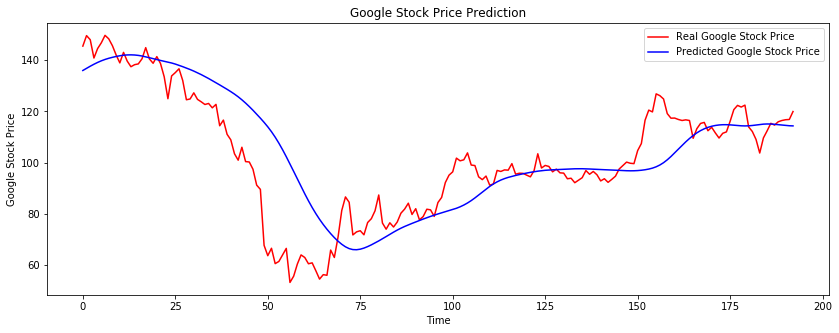

In [79]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()